In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image
import seaborn as sns

In [89]:
df = pd.read_csv('input/skin_cancer_mnist/HAM10000_metadata.csv')

image_path = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join('input/skin_cancer_mnist/','*','*jpg'))}

In [90]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

print(df['dx'].value_counts())


nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [91]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [93]:
#add path as new column
df['path'] = df['image_id'].map(image_path.get)

df['cell_type'] = df['dx'].map(lesion_type_dict.get)

df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes


df.sample(3)


,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
3089,HAM_0007391,ISIC_0031926,nv,follow_up,55.0,female,trunk,input/skin_cancer_mnist\HAM10000_images_part_2...,Melanocytic nevi,4
6224,HAM_0006468,ISIC_0030162,nv,follow_up,30.0,female,back,input/skin_cancer_mnist\HAM10000_images_part_2...,Melanocytic nevi,4
3386,HAM_0004639,ISIC_0025635,nv,follow_up,40.0,female,abdomen,input/skin_cancer_mnist\HAM10000_images_part_1...,Melanocytic nevi,4


In [15]:
df.describe(exclude=[np.number])


,lesion_id,image_id,dx,dx_type,sex,localization,path,cell_type
count,10015,10015,10015,10015,10015,10015,10015,10015
unique,7470,10015,7,4,3,15,10015,7
top,HAM_0003789,ISIC_0027419,nv,histo,male,back,input/skin_cancer_mnist\HAM10000_images_part_1...,Melanocytic nevi
freq,6,1,6705,5340,5406,2192,1,6705


<Axes: >

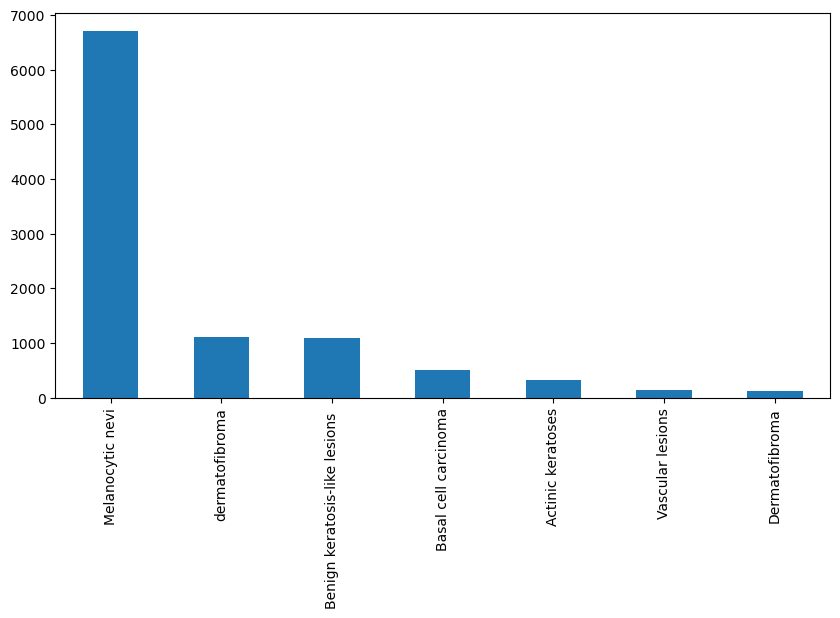

In [36]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
df['cell_type'].value_counts().plot(kind='bar', ax=ax1)


# Sorting image to subfolder

In [37]:
import pandas as pd
import os
import shutil

In [52]:
# set new data directories after dumping images into one folder
data_dir = os.getcwd() + '/input/all_images/'

dest_dir = os.getcwd() + '/input/reorganized/'


In [53]:
df2 = pd.read_csv('input/skin_cancer_mnist/HAM10000_metadata.csv')
print(df2['dx'].value_counts())

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [54]:
label = df2['dx'].unique().tolist()
label_images = []
label

['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']

In [55]:
for i in label:
    os.mkdir(dest_dir + str(i) + "/")
    sample = df[df['dx'] == i]['image_id']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir + "/"+ id +".jpg"), (dest_dir + i + "/"+id+".jpg"))
    label_images=[]    

# Importing Data

In [56]:
from keras.preprocessing.image import ImageDataGenerator
import os
from matplotlib import pyplot as plt

In [71]:
datagen = ImageDataGenerator()
train_dir = os.getcwd() + "/input/reorganized/"
#USe flow_from_directory
train_data_keras = datagen.flow_from_directory(directory=train_dir,
                                         batch_size=16,  #16 images at a time
                                         target_size=(32,32))  #Resize images

Found 10015 images belonging to 7 classes.


In [75]:
import tensorflow as tf
batch_size = 32
img_size = (32, 32)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.3, # Split the data into training and validation sets
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
)

Found 10015 files belonging to 7 classes.
Using 7011 files for training.


['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


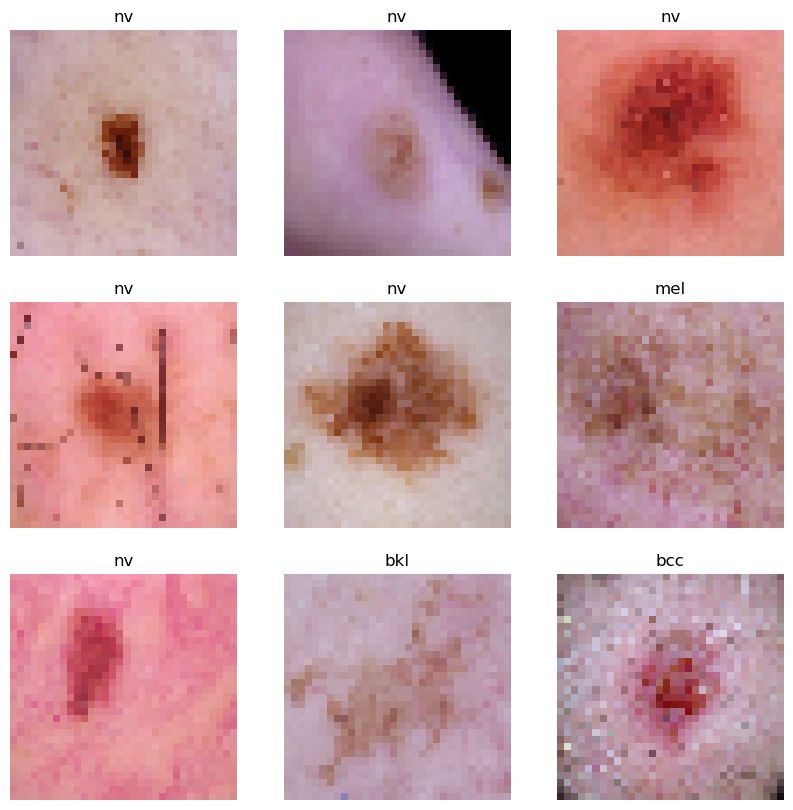

In [79]:
# Print the class names
class_names = train_ds.class_names
print(class_names)

# Visualize some of the images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

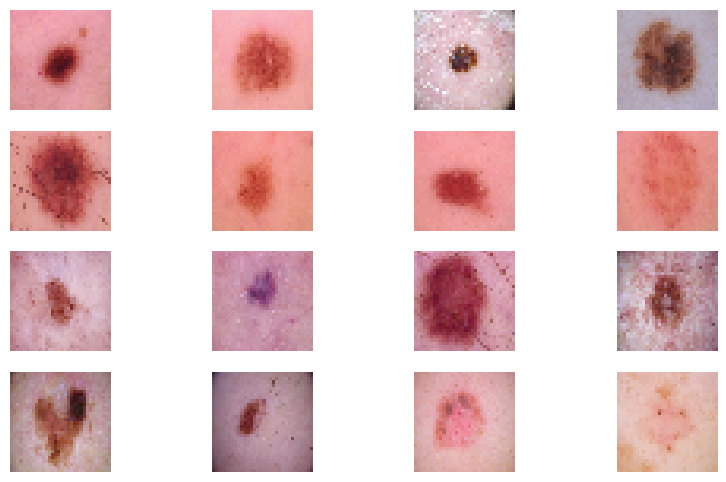

In [69]:
x, y = next(train_data_keras)
#View each image
plt.figure(figsize=(10,6))
for i in range (0,16):
    image = x[i].astype(int)
    plt.subplot(4,4,i+1)
    plt.imshow(image)
    plt.plot()
    plt.axis('Off')

In [84]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats

skin_df = pd.read_csv('input/skin_cancer_mnist//HAM10000_metadata.csv')


SIZE=32

# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))
 
skin_df['label'] = le.transform(skin_df["dx"]) 
print(skin_df.sample(10))


['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id     dx    dx_type   age     sex  \
6577  HAM_0003687  ISIC_0027515     nv  follow_up  40.0  female   
9927  HAM_0006301  ISIC_0031823  akiec      histo  75.0    male   
8072  HAM_0000348  ISIC_0028290     nv      histo  35.0    male   
9725  HAM_0004376  ISIC_0024843  akiec      histo  70.0  female   
624   HAM_0002548  ISIC_0028656    bkl      histo  50.0  female   
6929  HAM_0001849  ISIC_0028966     nv      histo  10.0  female   
9094  HAM_0001125  ISIC_0024827     nv      histo  60.0    male   
6630  HAM_0007406  ISIC_0028253     nv  follow_up  35.0  female   
9015  HAM_0002556  ISIC_0028243     nv      histo  55.0    male   
4871  HAM_0006431  ISIC_0031992     nv  follow_up  65.0    male   

         localization  label  
6577             foot      5  
9927             neck      0  
8072             back      5  
9725             face      0  
624   lower extremity      2  
6929  lower extremity    

C:\Users\nyila\AppData\Local\Temp\ipykernel_16548\1848369455.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age['age'], fit=stats.norm, color='red');


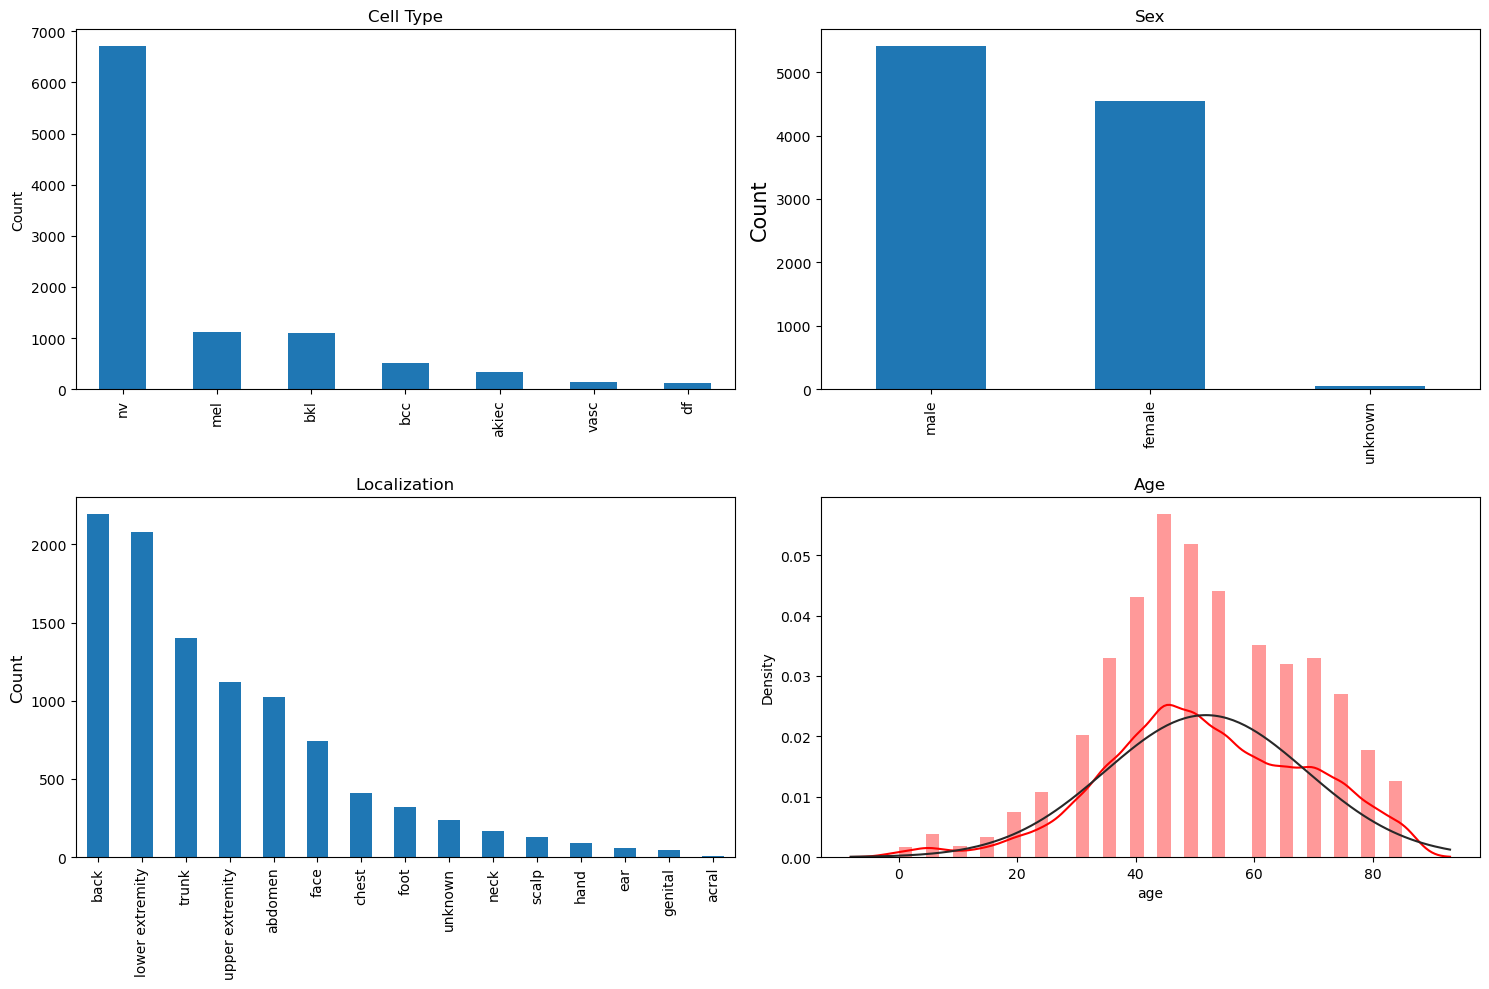

In [86]:
# Data distribution visualization
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')


ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()

# Resample data to print image

In [95]:
# Distribution of data into various classes 
from sklearn.utils import resample
print(skin_df['label'].value_counts())

#Balance data.
# Many ways to balance data... you can also try assigning weights during model.fit
#Separate each classes, resample, and combine back into single dataframe

df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

n_samples=500 
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced, df_5_balanced, df_6_balanced])

#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
print(skin_df_balanced['label'].value_counts())


5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64
0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: label, dtype: int64


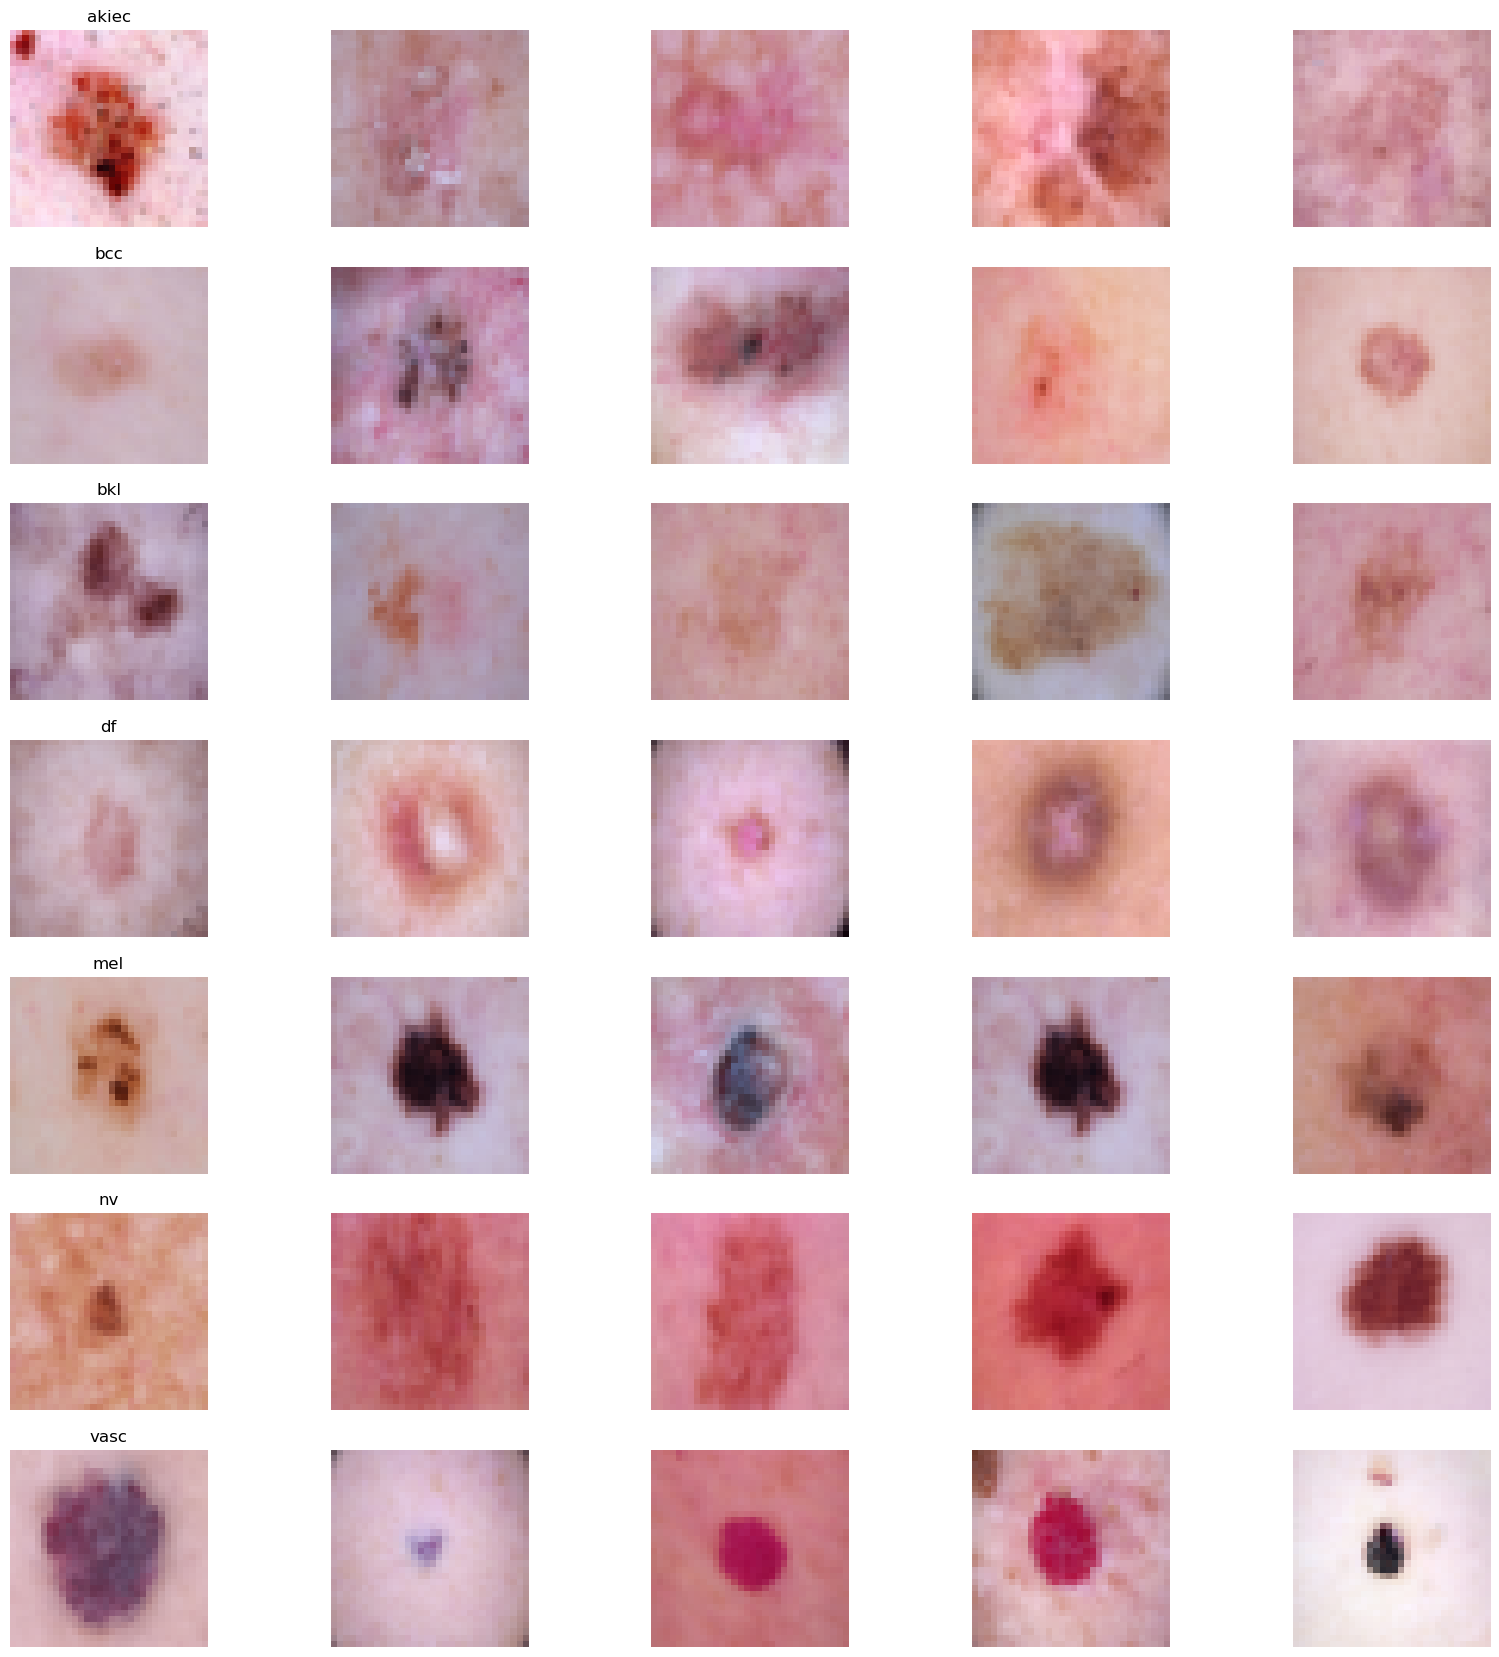

In [99]:


image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('input/skin_cancer_mnist/', '*', '*.jpg'))}
#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)
#Use the path to read images.
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))


n_samples = 5  

# Plot
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

fig.savefig('category_samples.png', dpi=300)